In [1]:
from principal_DBN_alpha import *
from principal_RBM_alpha import *
from utils import *
from tqdm import tqdm, notebook
import matplotlib.pyplot as plt

# Etude sur Binary AlphaDigit

In [2]:
data = lire_alpha_digit(caracs, path_data=path_data)

## RBM 

On entraine un RBM sur les données de Binary AlphaDigit puis on genere des images à partir de ce qu'il a appris.

In [3]:
neurons = 200
epochs = 200
nb_pixels = 20*16
learning_rate = 0.1
gibbs_steps = 200

### Affichage  de quelques images du dataset

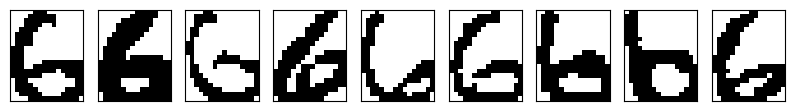

In [102]:
d1 = lire_alpha_digit(['6'], path_data)

# plot the first 9 images
fig, axs = plt.subplots(1,9, figsize=(10, 1.5))
for i in range(9):
    axs[i].imshow(d1[i].reshape(20,16), cmap='Greys')
    # dont show number of pixels
    axs[i].set_xticks([])
    axs[i].set_yticks([])
    # axs[i].axis()
# fig.suptitle('9 Premières images du chiffre 1 dans la base de données')
plt.show()


### RBM par charactère

On entraine un RBM pour chaque caractère.

In [71]:
list_rbm_caracs = []
for carac in notebook.tqdm(list(caracs.keys()), desc="Characters", unit="char", leave=True):
    data = lire_alpha_digit([carac], path_data)
    nb_pixels = data.shape[1]
    rbm = RBM(p = nb_pixels, q = neurons)
    rbm.train_RBM(x=data, epochs=epochs, lr=learning_rate, show_progress=False)
    list_rbm_caracs.append(rbm)

Characters:   0%|          | 0/36 [00:00<?, ?char/s]

génération des images à partir de chaque RBM

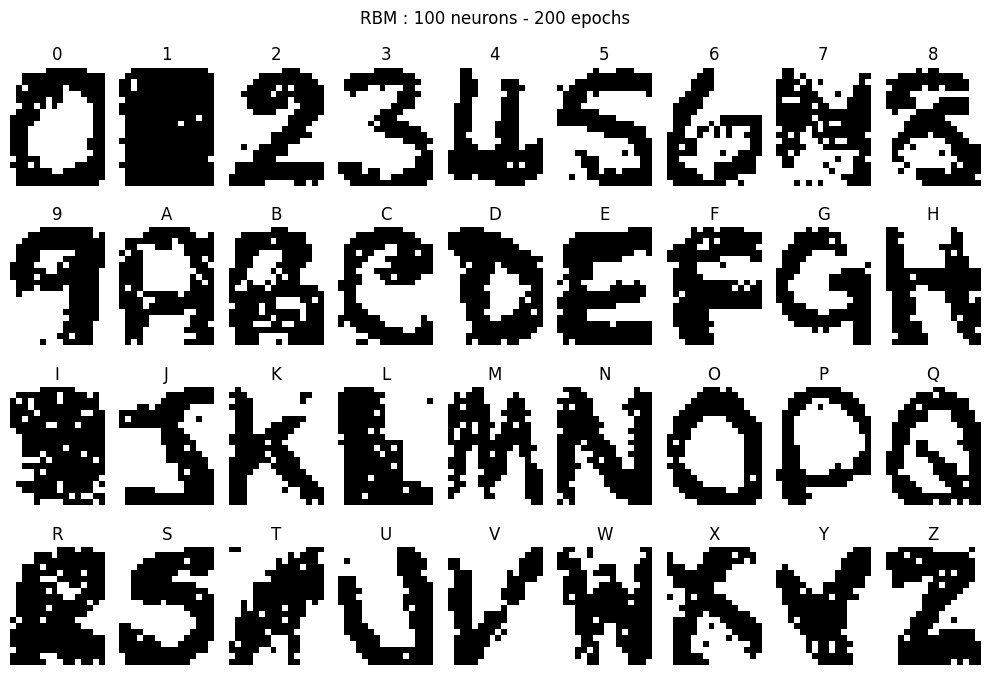

In [72]:
fig, axs = plt.subplots(4, 9, figsize=(10, 7), sharex=True, sharey=True)
axs = axs.flatten()

for i, rbm in enumerate(list_rbm_caracs):
    img = rbm.generer_image_RBM(gibbs_steps, 1)  # 1 image with 100 Gibbs steps
    
    img_reshaped = img[0].cpu().reshape(20, 16)
    
    axs[i].imshow(img_reshaped, cmap='Greys')
    axs[i].set_title(list(caracs.keys())[i])
    axs[i].axis('off')

# Adjust layout to prevent overlap
# plt.tight_layout()
plt.suptitle(f'RBM : {neurons} neurons - {epochs} epochs')
# Adjust layout to prevent overlap 
plt.tight_layout()
plt.show()

fig.savefig(f'figs/RBM_1parcarac_{neurons}neurons_{epochs}epochs.png')

### Plusieurs caractères par RBM

In [ ]:
neurons = 500
epochs = 500
nb_pixels = 20*16
learning_rate = 0.1
gibbs_steps = 200

caracteres = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9", "A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "L", "M", "N", "O", "P", "Q", "R", "S", "T", "U", "V", "W", "X", "Y", "Z"]
# caracteres = ["]
data = lire_alpha_digit(caracteres, path_data)

nb_pixels = data.shape[1]
rbm = RBM(p = nb_pixels, q = neurons)
rbm.train_RBM(x=data, epochs=epochs, lr=learning_rate, show_progress=True)
    
    
nb_images = 9

fig, axs = plt.subplots(1,9, figsize=(10, 2), sharex=True, sharey=True)
axs = axs.flatten()


# Generate 4 images for each character
for i in range(nb_images):
    img = rbm.generer_image_RBM(gibbs_steps, 1)  # 1 image with 100 Gibbs steps
    
    img_reshaped = img[0].cpu().reshape(20, 16)
    
    axs[i].imshow(img_reshaped, cmap='Greys')
    # axs[i].set_title("A")
    axs[i].axis('off')
fig.suptitle(f'RBM with {neurons} neurons and {epochs} epochs')
plt.show()
# fig.savefig(f"figs/RBM_ABCDEF_{epochs}epochs_{neurons}neurons.png",)

### Tester differents parametres

In [ ]:
list_neurons = [50,100,200]
list_epochs = [100,200,300]

for neurons in notebook.tqdm(list_neurons, desc="Neurons list", unit="Neurons", leave=False):
    for epochs in notebook.tqdm(list_epochs, desc="Epochs list", unit="epochs", leave=False):
        list_rbm_caracs = []
        for carac in notebook.tqdm(list(caracs.keys()), desc="Characters", unit="char", leave=False):
            data = lire_alpha_digit([carac], path_data)
            nb_pixels = data.shape[1]
            rbm = RBM(p = nb_pixels, q = neurons)
            rbm.train_RBM(x=data, epochs=epochs, lr=learning_rate, show_progress=False)
            list_rbm_caracs.append(rbm)

        fig, axs = plt.subplots(4, 9, figsize=(10, 7), sharex=True, sharey=True)
        axs = axs.flatten()

        for i, rbm in enumerate(list_rbm_caracs):
            img = rbm.generer_image_RBM(gibbs_steps, 1)  # 1 image with 100 Gibbs steps

            img_reshaped = img[0].cpu().reshape(20, 16)

            axs[i].imshow(img_reshaped, cmap='Greys')
            axs[i].set_title(list(caracs.keys())[i])
            axs[i].axis('off')
        
        # add figure title 
        plt.suptitle(f'RBM with {neurons} neurons and {epochs} epochs')
        # Adjust layout to prevent overlap 
        plt.tight_layout()
        # save the figure
        plt.savefig(f'res/RBM-{neurons}neurons-{epochs}epochs.png')


## DBN

Un DBN par caractère

In [ ]:
liste_dbn_caracs = []

for carac in notebook.tqdm(list(caracs.keys()), desc="Characters", unit="char", leave=True):
            data = lire_alpha_digit([carac], path_data)     
            nb_pixels = data.shape[1]
            # les couches du dbn (de chaque rbm en soit)
            layers = [nb_pixels, neurons, neurons, neurons]

            dbn = DBN(layers=layers)
            dbn.train_DBN(x=data, epochs=epochs, lr=learning_rate, plot=False, show_progress=True)
            liste_dbn_caracs.append(dbn)
            
    


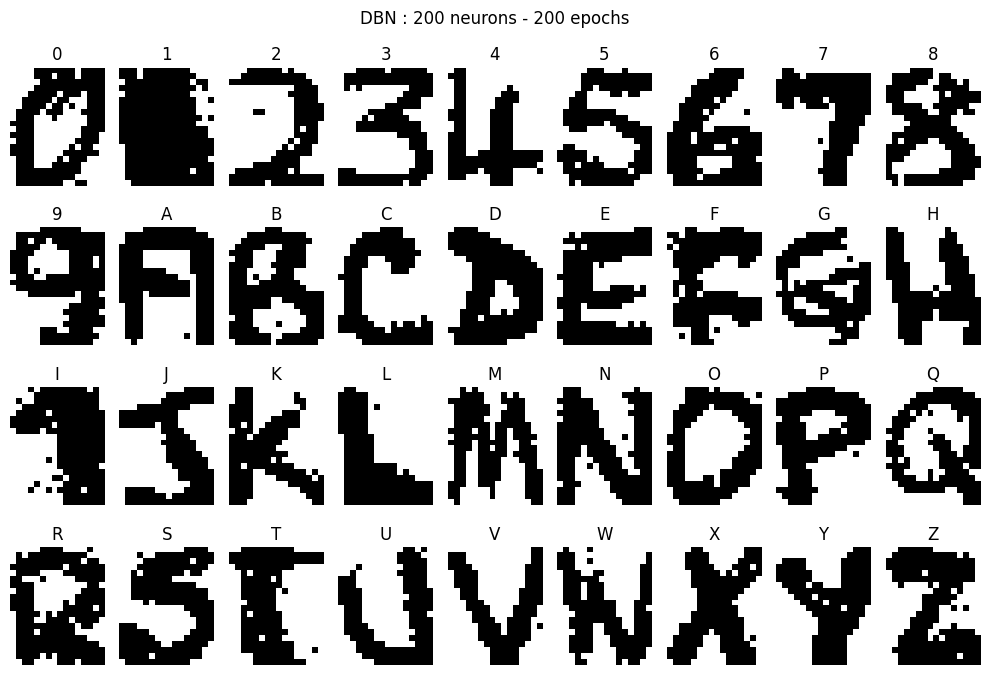

In [14]:
fig, axs = plt.subplots(4, 9, figsize=(10, 7), sharex=True, sharey=True)
axs = axs.flatten()

for i ,dbn in enumerate(liste_dbn_caracs):
    img = dbn.generer_image_DBN(gibbs_steps, 1)  # 1 image with 100 Gibbs steps
    
    img_reshaped = img[0].cpu().reshape(20, 16)
    
    axs[i].imshow(img_reshaped, cmap='Greys')
    axs[i].set_title(list(caracs.keys())[i])
    axs[i].axis('off')

# Adjust layout to prevent overlap
# plt.tight_layout()
plt.suptitle(f'DBN : {neurons} neurons - {epochs} epochs')
# Adjust layout to prevent overlap 
plt.tight_layout()
plt.show()

# fig.savefig(f'figs/RBM_1parcarac_{neurons}neurons_{epochs}epochs.png')

### Plusieurs caractères par DBN

Training DBN: 100%|██████████| 3/3 [00:01<00:00,  1.51RBM/s]


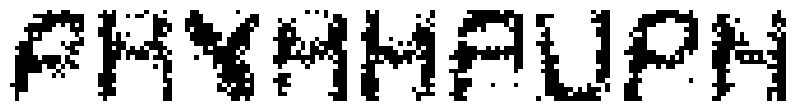

In [26]:
neurons = 250
epochs = 100
nb_pixels = 20*16
learning_rate = 0.1
gibbs_steps = 200
caracteres = [ "1", "2", "3", "4", "5", "6", "7", "8", "9", "A", "B", "D", "E", "F", "G", "H", "I", "J", "K", "L", "M", "N", "P", "R", "S", "T", "U", "V", "W", "X", "Y", "Z"]
data = lire_alpha_digit(caracteres, path_data)     
nb_pixels = data.shape[1]
# les couches du dbn (de chaque rbm en soit)
nb_layers = 3
layers = [nb_pixels] + [neurons]*nb_layers

dbn = DBN(layers=layers)
dbn.train_DBN(x=data, epochs=epochs, lr=learning_rate, plot=False, show_progress=True)


nb_images = 9

fig, axs = plt.subplots(nb_images//9,9, figsize=(10, 7), sharex=True, sharey=True)
# fig, axs = plt.subplots(1,9, figsize=(10, 7), sharex=True, sharey=True)
axs = axs.flatten()


# Generate 4 images for each character
for i in range(nb_images):
    img = dbn.generer_image_DBN(gibbs_steps, 1)  # 1 image with 100 Gibbs steps
    
    img_reshaped = img[0].cpu().reshape(20, 16)
    
    axs[i].imshow(img_reshaped, cmap='Greys')
    # axs[i].set_title("A")
    axs[i].axis('off')
# fig.savefig(f"figs/DBN_allcarac_{epochs}epochs_{neurons}neurons_{nb_layers}layers.png",)


Tester le DBN pour differents parametres

In [ ]:
nb_layers = [2,3,4]
list_neurons = [50,100,200]
list_epochs = [100,200,300]

for nb_layers in notebook.tqdm(nb_layers, desc="Layers list", unit="Layers", leave=False):
    for neurons in notebook.tqdm(list_neurons, desc="Neurons list", unit="Neurons", leave=False):
        for epochs in notebook.tqdm(list_epochs, desc="Epochs list", unit="epochs", leave=False):
            liste_dbn_caracs = []
            for carac in notebook.tqdm(list(caracs.keys()), desc="Characters", unit="char", leave=False):
                data = lire_alpha_digit([carac], path_data)     
                nb_pixels = data.shape[1]
                # les couches du dbn (de chaque rbm en soit)
                layers = [nb_pixels] + [neurons]*nb_layers

                dbn = DBN(layers=layers)
                dbn.train_DBN(x=data, epochs=[epochs], lr=learning_rate, plot=False, show_progress=False)
                liste_dbn_caracs.append(dbn)

            fig, axs = plt.subplots(4, 9, figsize=(10, 7), sharex=True, sharey=True)
            axs = axs.flatten()

            for i, dbn in enumerate(liste_dbn_caracs):
                img = dbn.generer_image_DBN(gibbs_steps, 1)  # 1 image with 100 Gibbs steps

                img_reshaped = img[0].cpu().reshape(20, 16)

                axs[i].imshow(img_reshaped, cmap='Greys')
                axs[i].set_title(list(caracs.keys())[i])
                axs[i].axis('off')

            # add figure title 
            plt.suptitle(f'DBN with {nb_layers} layers, {neurons} neurons and {epochs} epochs')
            # Adjust layout to prevent overlap 
            plt.tight_layout()
            # save the figure
            plt.savefig(f'res/DBN-{nb_layers}layers-{neurons}neurons-{epochs}epochs.png')

# Étude sur MNIST

## Chargement des données MNIST et processing

In [2]:
from principal_DNN_MNIST import *

In [3]:
import torchvision.datasets
import torchvision.transforms as transforms
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# device = torch.device("cpu")

transform = transforms.ToTensor()
# if not exist, download mnist dataset
train_set = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_set = torchvision.datasets.MNIST(root='./data', train=False, transform=transform, download=True)
# take only 300 samples so the model can overfit to see if it works
# train_set.data = train_set.data[:300]
# train_set.targets = train_set.targets[:300]
train_set.data = (train_set.data > 127).float()
test_set.data = (test_set.data > 127).float()
# Applatir les images (28*28) en vecteurs (784)
train_mnist = train_set.data.view(train_set.data.shape[0], -1).float().to(device)
test_mnist = test_set.data.view(test_set.data.shape[0], -1).float().to(device) 



In [4]:
# One Hot Encoding des labels
labels_train_mnist = torch.nn.functional.one_hot(train_set.targets).float().to(device)
labels_test_mnist = torch.nn.functional.one_hot(test_set.targets).float().to(device)


train_mnist.shape, labels_train_mnist.shape, test_mnist.shape, labels_test_mnist.shape


(torch.Size([60000, 784]),
 torch.Size([60000, 10]),
 torch.Size([10000, 784]),
 torch.Size([10000, 10]))

## Test du DNN sur MNIST

In [5]:

nb_pixels = train_mnist.shape[1]
neurons = 500
epochs = 500
learning_rate = 0.17
nb_layers = 3
layers_dbn = [nb_pixels] + [neurons]*(nb_layers-1)
nb_classes = len(train_set.class_to_idx)
batch_size = 300

### DNN pre-entrainement

In [ ]:
dnn_pretrain = DNN(layers_dbn, nb_classes=nb_classes)
dnn_pretrain.pretrain_DNN(x=train_mnist, epochs=300, batch_size=batch_size,lr=learning_rate, show_progress=True)

Training DBN:  67%|██████▋   | 2/3 [01:50<00:53, 53.86s/RBM]

### Backpropagation sur 2 DNN

Non pré-entrainé

In [ ]:
dnn_non_pretrain = DNN(layers_dbn, nb_classes=nb_classes)
dnn_non_pretrain.retropropagation(X=train_mnist, Y=labels_train_mnist, epochs=epochs, lr=learning_rate, batch_size=batch_size, show_progress=True)

Pre-entrainé 

In [ ]:
dnn_pretrain.retropropagation(X=train_mnist, Y=labels_train_mnist, epochs=epochs, lr=learning_rate,batch_size=batch_size, show_progress=True)

### Test des deux DNN

In [ ]:
dnn_pretrain.test_DNN(test_mnist, labels_test_mnist)

In [ ]:
dnn_non_pretrain.test_DNN(test_mnist, labels_test_mnist)

### Figures

In [5]:
nb_pixels = train_mnist.shape[1]
neurons = 200
epochs = 200
learning_rate = 0.09
nb_layers = 2
layers_dbn = [nb_pixels] + [neurons]*(nb_layers-1)
nb_classes = len(train_set.class_to_idx)
batch_size = 300

In [6]:
X_train_test = torch.cat((train_mnist, test_mnist), 0)
Y_train_test = torch.cat((labels_train_mnist, labels_test_mnist), 0)

### Variation du nombre de couches

Layers list:   0%|          | 0/5 [00:00<?, ?Layers/s]

Training DNN: 100%|██████████| 200/200 [03:15<00:00,  1.02epoch/s, Loss=0.256]


Error of DNN with 1 layers without pretraining: 0.066600002348423


Training DNN: 100%|██████████| 200/200 [04:01<00:00,  1.21s/epoch, Loss=0.144]


Error of DNN with 2 layers without pretraining: 0.04129999876022339


Training DNN: 100%|██████████| 200/200 [04:30<00:00,  1.35s/epoch, Loss=0.227]


Error of DNN with 3 layers without pretraining: 0.065700002014637


Training DNN: 100%|██████████| 200/200 [04:48<00:00,  1.44s/epoch, Loss=0.134]


Error of DNN with 4 layers without pretraining: 0.8971999883651733


Training DNN: 100%|██████████| 200/200 [04:56<00:00,  1.48s/epoch, Loss=0.193]


Error of DNN with 5 layers without pretraining: 0.9025999903678894
[tensor(0.0664), tensor(0.0349), tensor(0.0389), tensor(0.0466), tensor(0.0456)]
[tensor(0.0666), tensor(0.0413), tensor(0.0657), tensor(0.8972), tensor(0.9026)]


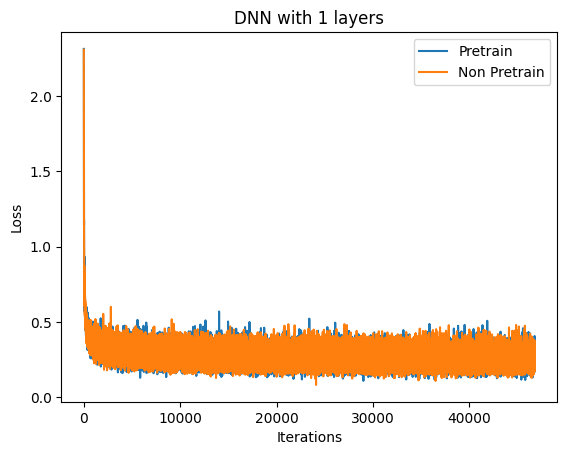

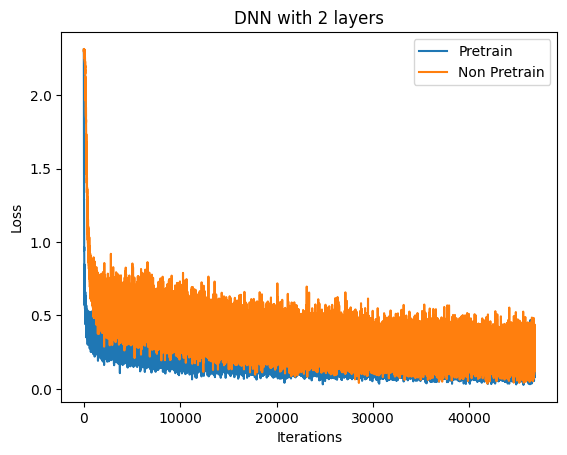

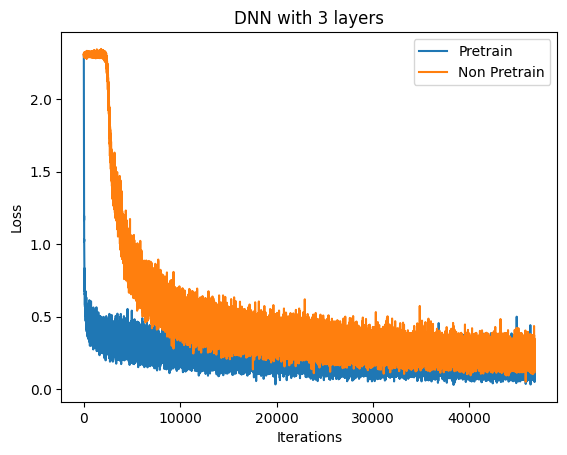

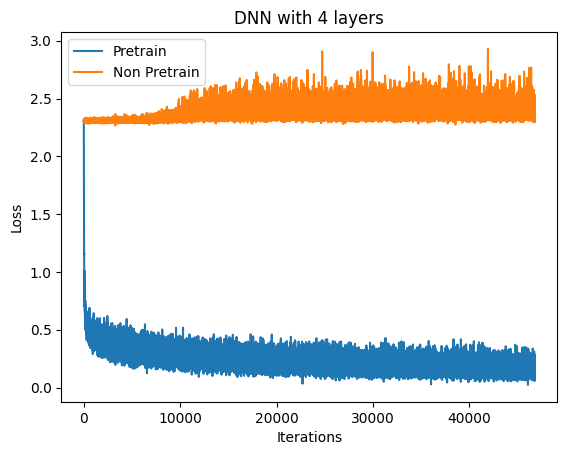

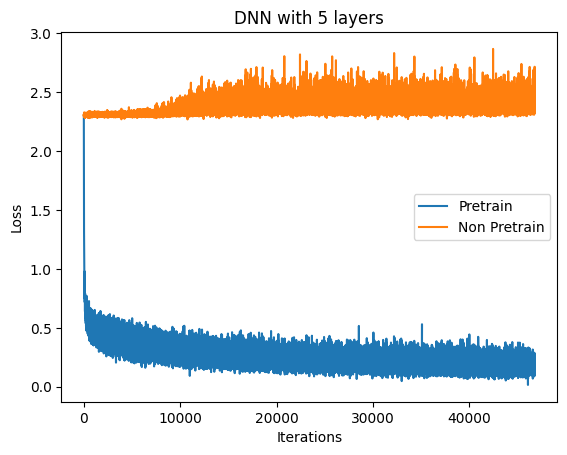

In [9]:
errors_pretrain = []
errors_non_pretrain = []
for nb_layers in notebook.tqdm([1,2,3,4,5], desc="Layers list", unit="Layers", leave=False):
    layers_dbn = [nb_pixels] + [neurons]*(nb_layers-1)
    dnn_pretrain = DNN(layers_dbn, nb_classes=nb_classes)
    dnn_non_pretrain = DNN(layers_dbn, nb_classes=nb_classes)
    dnn_pretrain.pretrain_DNN(x=X_train_test, epochs=epochs, lr=learning_rate, show_progress=True)

    loss_non_pretrain = dnn_non_pretrain.retropropagation(X=X_train_test, Y=Y_train_test, epochs=epochs, lr=learning_rate, batch_size=batch_size, show_progress=True)
    loss_pretrain = dnn_pretrain.retropropagation(X=X_train_test, Y=Y_train_test, epochs=epochs, lr=learning_rate,batch_size=batch_size, show_progress=True)
    error_pretrain,_ = dnn_pretrain.test_DNN(test_mnist, labels_test_mnist)
    error_non_pretrain,_ = dnn_non_pretrain.test_DNN(test_mnist, labels_test_mnist)
    errors_pretrain.append(error_pretrain)
    errors_non_pretrain.append(error_non_pretrain)
    # plot losses for each model
    figure = plt.figure()
    plt.plot(loss_pretrain, label='Pretrain')
    plt.plot(loss_non_pretrain, label='Non Pretrain')
    plt.title(f'DNN with {nb_layers} layers')
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    plt.legend()
    plt.savefig(f'res/DNN-{nb_layers}layers.png')
    # torch.save(dnn_pretrain, f'res/dnn_pretrain_{nb_layers}layers.pth')
    torch.save(dnn_non_pretrain, f'res/dnn_non_pretrain_{nb_layers}layers.pth')
    # print(f"Error of DNN with {nb_layers} layers with pretraining: {error_pretrain}")
    print(f"Error of DNN with {nb_layers} layers without pretraining: {error_non_pretrain}")
    
print(errors_pretrain)
print(errors_non_pretrain)

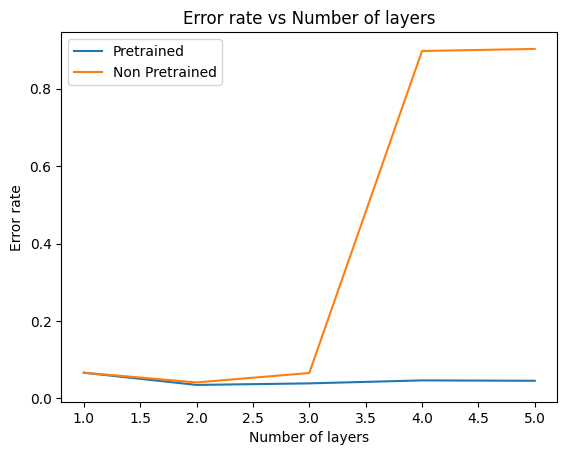

In [10]:
# plot errors   
plt.plot([1,2,3,4,5], errors_pretrain, label='Pretrained')
plt.plot([1,2,3,4,5], errors_non_pretrain, label='Non Pretrained')
plt.xlabel('Number of layers')
plt.ylabel('Error rate')
plt.title('Error rate vs Number of layers')
plt.legend()
plt.savefig('res/errors.png')
plt.show()


### Variation du nombre de neurones

In [11]:
nb_pixels = train_mnist.shape[1]
neurons = 200
epochs = 200
learning_rate = 0.1
nb_layers = 2
layers_dbn = [nb_pixels] + [neurons]*(nb_layers-1)
nb_classes = len(train_set.class_to_idx)
batch_size = 300

Neurons list:   0%|          | 0/6 [00:00<?, ?Neurons/s]

Training DNN: 100%|██████████| 200/200 [04:15<00:00,  1.28s/epoch, Loss=0.0732]


[tensor(0.0452), tensor(0.0353), tensor(0.0319), tensor(0.0290), tensor(0.0298), tensor(0.0291)]
[tensor(0.0413), tensor(0.0387), tensor(0.0352), tensor(0.0364), tensor(0.0370), tensor(0.0395)]


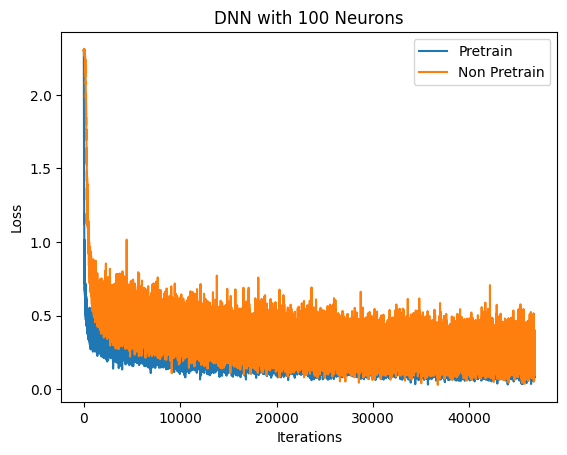

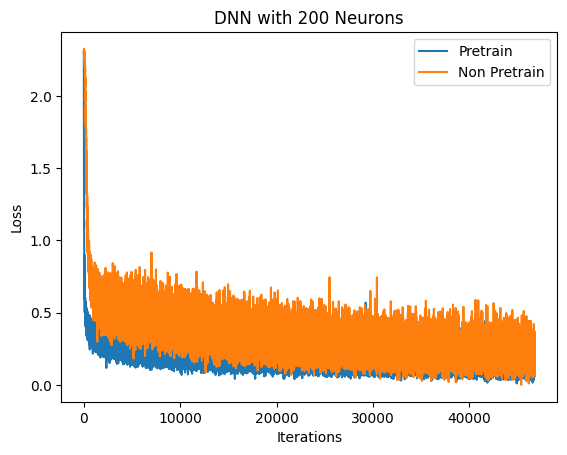

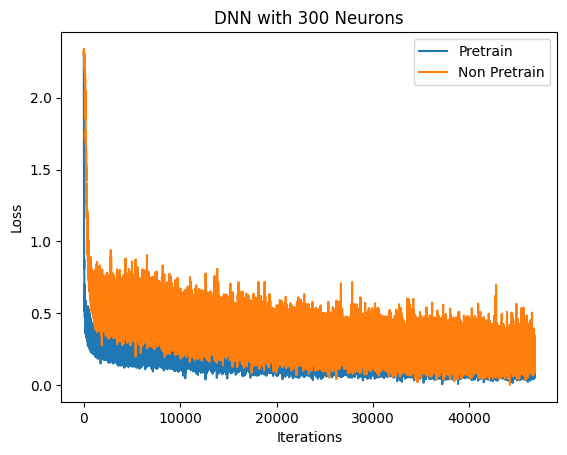

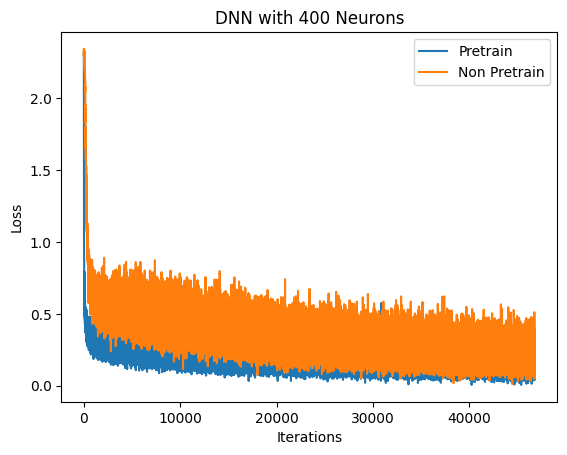

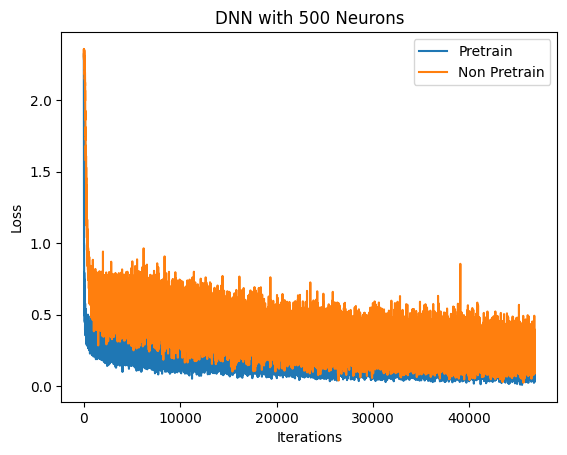

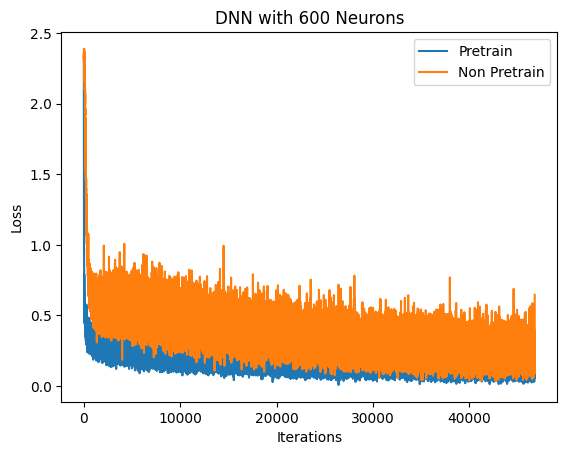

In [12]:
errors_pretrain = []
errors_non_pretrain = []
for neurons in notebook.tqdm(range(100,601,100), desc="Neurons list", unit="Neurons", leave=False):
    layers_dbn = [nb_pixels] + [neurons]*(nb_layers-1)
    dnn_pretrain = DNN(layers_dbn, nb_classes=nb_classes)
    dnn_non_pretrain = DNN(layers_dbn, nb_classes=nb_classes)
    dnn_pretrain.pretrain_DNN(x=X_train_test, epochs=epochs, lr=learning_rate, show_progress=True)

    loss_non_pretrain = dnn_non_pretrain.retropropagation(X=X_train_test, Y=Y_train_test, epochs=epochs, lr=learning_rate, batch_size=batch_size, show_progress=True)
    loss_pretrain = dnn_pretrain.retropropagation(X=X_train_test, Y=Y_train_test, epochs=epochs, lr=learning_rate,batch_size=batch_size, show_progress=True)
    error_pretrain,_ = dnn_pretrain.test_DNN(test_mnist, labels_test_mnist)
    error_non_pretrain,_ = dnn_non_pretrain.test_DNN(test_mnist, labels_test_mnist)
    errors_pretrain.append(error_pretrain)
    errors_non_pretrain.append(error_non_pretrain)
    # plot losses for each model
    figure = plt.figure()
    plt.plot(loss_pretrain, label='Pretrain')
    plt.plot(loss_non_pretrain, label='Non Pretrain')
    plt.title(f'DNN with {neurons} Neurons')
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    plt.legend()
    plt.savefig(f'res/DNN-{neurons}neurons-.png')
    torch.save(dnn_pretrain, f'res/dnn_pretrain_{neurons}neurons.pth')
    torch.save(dnn_non_pretrain, f'res/dnn_non_pretrain_{neurons}neurons.pth')
    
print(errors_pretrain)
print(errors_non_pretrain)

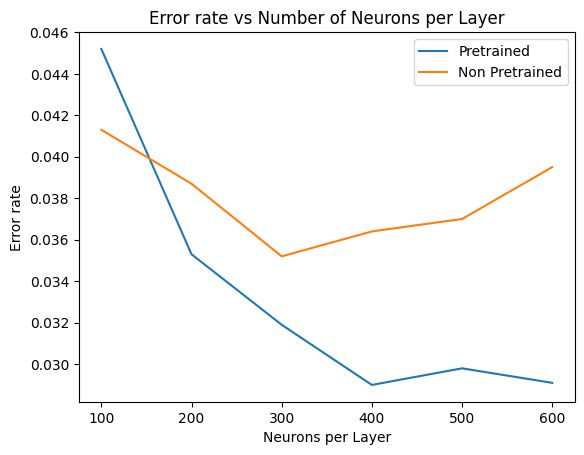

In [14]:
# plot errors   
plt.plot(list(range(100,601,100)), errors_pretrain, label='Pretrained')
plt.plot(list(range(100,601,100)), errors_non_pretrain, label='Non Pretrained')
plt.xlabel('Neurons per Layer')
plt.ylabel('Error rate')
plt.title('Error rate vs Number of Neurons per Layer')
plt.legend()
plt.savefig('res/error_rate_neurons.png')
plt.show()

### Variation des données d'entrainement

In [15]:
nb_pixels = train_mnist.shape[1]
neurons = 200
epochs = 200
learning_rate = 0.1
nb_layers = 2
layers_dbn = [nb_pixels] + [neurons]*(nb_layers-1)
nb_classes = len(train_set.class_to_idx)
batch_size = 300

Dataset size list:   0%|          | 0/6 [00:00<?, ?Size/s]

Training DNN: 100%|██████████| 200/200 [03:28<00:00,  1.04s/epoch, Loss=0.101]


[tensor(0.0342), tensor(0.0374), tensor(0.0334), tensor(0.0356), tensor(0.0351), tensor(0.0346)]
[tensor(0.0364), tensor(0.0367), tensor(0.0364), tensor(0.0396), tensor(0.0342), tensor(0.0345)]


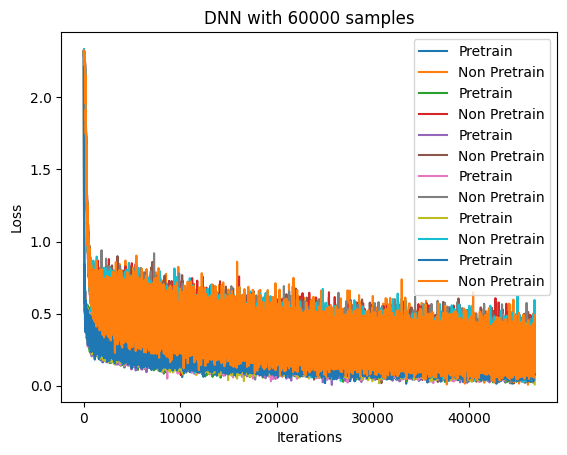

In [16]:
errors_pretrain = []
errors_non_pretrain = []
for samples in notebook.tqdm([1000, 3000, 7000, 10000, 30000, 60000], desc="Dataset size list", unit="Size", leave=False):
    X_train = X_train_test[:samples]
    Y_train = Y_train_test[:samples]
    dnn_pretrain = DNN(layers_dbn, nb_classes=nb_classes)
    dnn_non_pretrain = DNN(layers_dbn, nb_classes=nb_classes)
    dnn_pretrain.pretrain_DNN(x=X_train_test, epochs=epochs, lr=learning_rate, show_progress=True)

    loss_non_pretrain = dnn_non_pretrain.retropropagation(X=X_train_test, Y=Y_train_test, epochs=epochs, lr=learning_rate, batch_size=batch_size, show_progress=True)
    loss_pretrain = dnn_pretrain.retropropagation(X=X_train_test, Y=Y_train_test, epochs=epochs, lr=learning_rate,batch_size=batch_size, show_progress=True)
    error_pretrain,_ = dnn_pretrain.test_DNN(test_mnist, labels_test_mnist)
    error_non_pretrain,_ = dnn_non_pretrain.test_DNN(test_mnist, labels_test_mnist)
    errors_pretrain.append(error_pretrain)
    errors_non_pretrain.append(error_non_pretrain)
    # plot losses for each model
    plt.plot(loss_pretrain, label='Pretrain')
    plt.plot(loss_non_pretrain, label='Non Pretrain')
    plt.title(f'DNN with {samples} samples')
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    plt.legend()
    plt.savefig(f'res/DNN-{samples}samples.png')
    torch.save(dnn_pretrain, f'res/dnn_pretrain_{samples}samples.pth')
    torch.save(dnn_non_pretrain, f'res/dnn_non_pretrain_{samples}samples.pth')
    
print(errors_pretrain)
print(errors_non_pretrain)

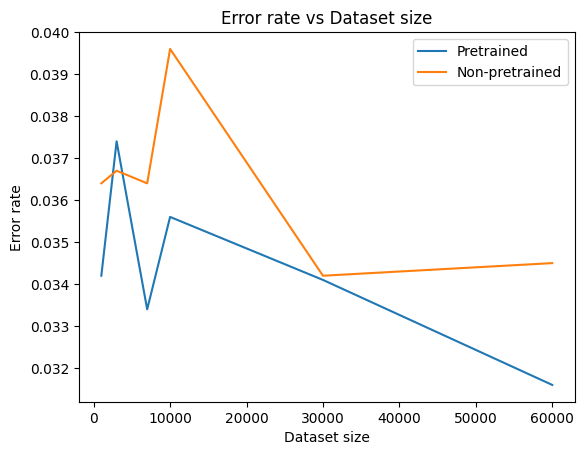

In [ ]:
plt.plot([1000, 3000, 7000, 10000, 30000, 60000], errors_pretrain, label='Pretrained')
plt.plot([1000, 3000, 7000, 10000, 30000, 60000], errors_non_pretrain, label='Non Pretrained')
plt.xlabel('Dataset size')
plt.ylabel('Error rate')
plt.title('Error rate vs Dataset size')
plt.legend()
plt.savefig('res/error_rate_dataset_size.png')
plt.show()

## Finetuning DNN sur MNIST

In [ ]:
list_nb_layers = [1,2,3,4]
list_learning_rates = [0.1, 0.12 ,0.15, 0.18, 0.2]
epochs_pretrain = 300
epochs_backprop = 500
neurons = 500
nb_pixels = train_mnist.shape[1]
nb_classes = len(train_set.class_to_idx)
batch_size = 300
# grid search for the best number of layers and learning rate
for nb_layers in notebook.tqdm(list_nb_layers, desc="nb_layers", unit="nb_layers"):
    for learning_rate in notebook.tqdm(list_learning_rates, desc="learning_rate",unit="learning_rate"):
        layers_dbn = [nb_pixels] + [neurons]*(nb_layers-1)
        dnn = DNN(layers_dbn, nb_classes)
        dnn.pretrain_DNN(x=train_mnist, epochs=epochs_pretrain, lr=learning_rate, batch_size=batch_size,show_progress=False)
        dnn.retropropagation(X=train_mnist, Y=labels_train_mnist, epochs=epochs_backprop, lr=learning_rate,batch_size=batch_size, show_progress=False)
        erreur,_ = dnn.test_DNN(torch.cat((train_mnist, test_mnist)), torch.cat((labels_train_mnist, labels_test_mnist)))

        print(f"nb_layers = {nb_layers}, learning_rate = {learning_rate}, accuracy = {erreur}")
        print("")

nb_layers:   0%|          | 0/4 [00:00<?, ?nb_layers/s]

learning_rate:   0%|          | 0/5 [00:00<?, ?learning_rate/s]

nb_layers = 1, learning_rate = 0.1, accuracy = 0.07045714557170868

nb_layers = 1, learning_rate = 0.12, accuracy = 0.07001428306102753

nb_layers = 1, learning_rate = 0.15, accuracy = 0.0698142871260643

nb_layers = 1, learning_rate = 0.18, accuracy = 0.06889999657869339

nb_layers = 1, learning_rate = 0.2, accuracy = 0.06894285976886749



learning_rate:   0%|          | 0/5 [00:00<?, ?learning_rate/s]

nb_layers = 2, learning_rate = 0.1, accuracy = 0.01841428503394127

nb_layers = 2, learning_rate = 0.12, accuracy = 0.01581428572535515

nb_layers = 2, learning_rate = 0.15, accuracy = 0.013642856851220131

nb_layers = 2, learning_rate = 0.18, accuracy = 0.012757143005728722

nb_layers = 2, learning_rate = 0.2, accuracy = 0.011071428656578064



learning_rate:   0%|          | 0/5 [00:00<?, ?learning_rate/s]

nb_layers = 3, learning_rate = 0.1, accuracy = 0.016828570514917374

nb_layers = 3, learning_rate = 0.12, accuracy = 0.015585714019834995

nb_layers = 3, learning_rate = 0.15, accuracy = 0.012385713867843151

nb_layers = 3, learning_rate = 0.18, accuracy = 0.011214286088943481

nb_layers = 3, learning_rate = 0.2, accuracy = 0.00989999994635582



learning_rate:   0%|          | 0/5 [00:00<?, ?learning_rate/s]

nb_layers = 4, learning_rate = 0.1, accuracy = 0.015428571030497551

nb_layers = 4, learning_rate = 0.12, accuracy = 0.013100000098347664

nb_layers = 4, learning_rate = 0.15, accuracy = 0.011257142759859562

nb_layers = 4, learning_rate = 0.18, accuracy = 0.010014285333454609

nb_layers = 4, learning_rate = 0.2, accuracy = 0.009328571148216724

